In [1]:
%load_ext lab_black
import os, sys
import pickle
from copy import deepcopy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import deerlab as dl
import MDAnalysis as mda
import chilife as xl


plt.style.use("chiLife")
sns.set(
    # context="talk",
    # font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

#  DEER Functions

In [2]:
def load_pkl(filename):

    with open(filename, "rb") as f:
        obj = pickle.load(f)

    return obj


def preprocess(FitObj):
    # Scale V
    scale = FitObj.P_scale
    FitObj.Vexp /= scale
    FitObj.model /= scale

    FitObj.Vci95 = FitObj.modelUncert.ci(95).T / scale
    FitObj.B /= scale
    FitObj.Bci95 = FitObj.BUncert.ci(95).T / scale

    # Convert to angstrom
    FitObj.r *= 10
    FitObj.AUC = np.trapz(FitObj.P, FitObj.r)
    FitObj.P /= FitObj.AUC
    FitObj.Pci95 = FitObj.PUncert.ci(95).T / FitObj.AUC

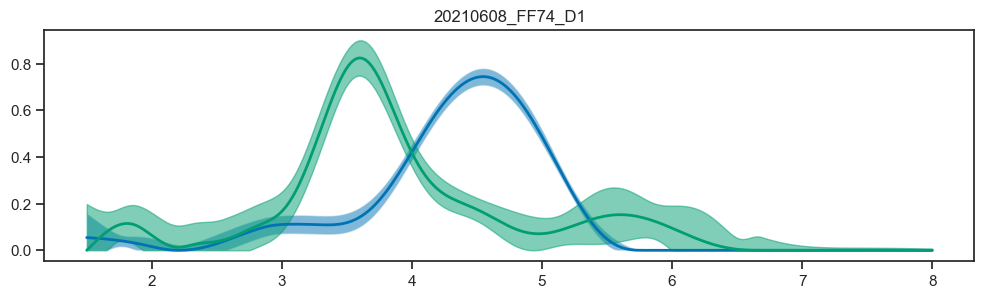

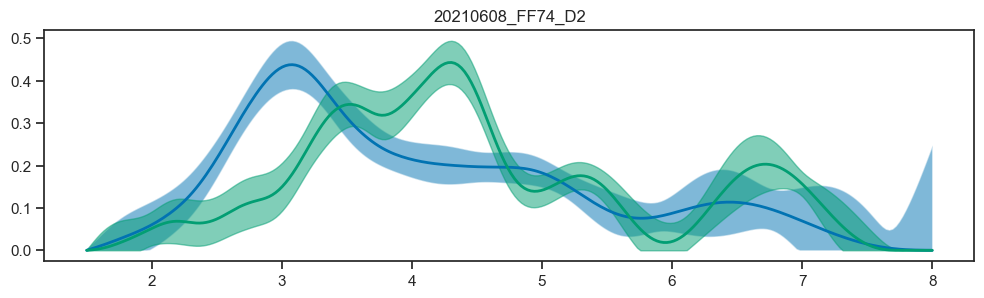

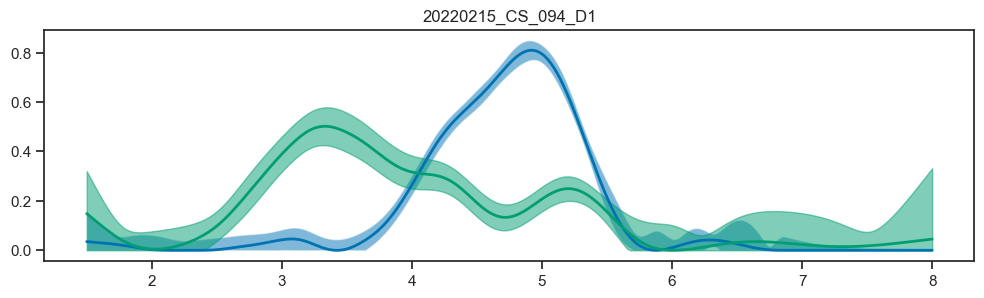

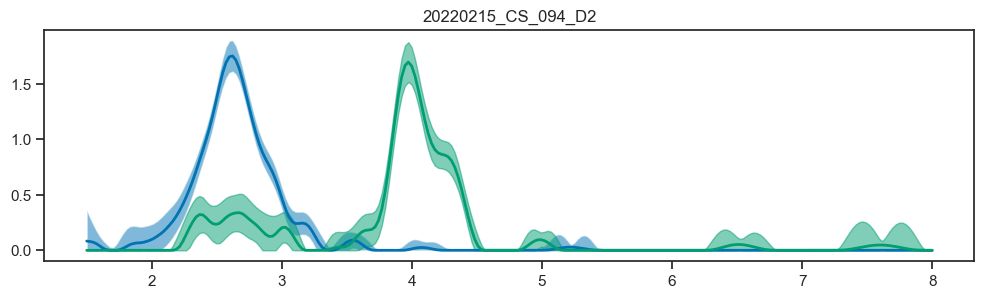

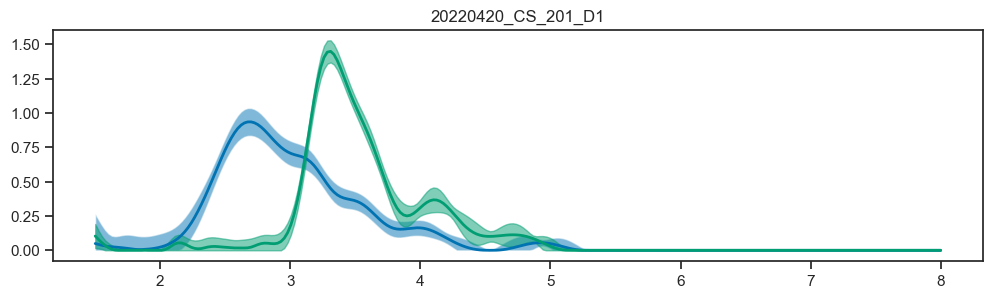

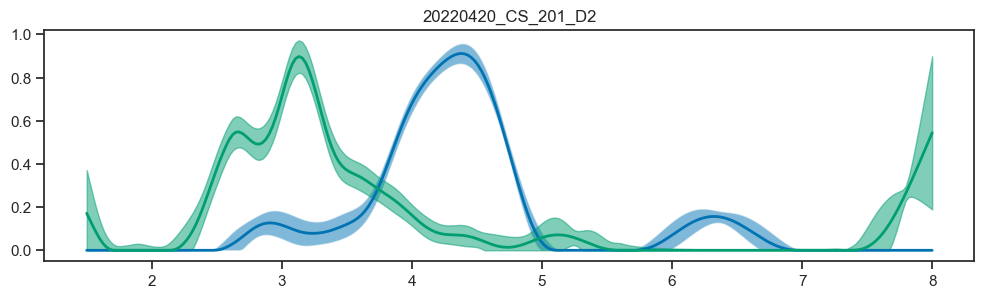

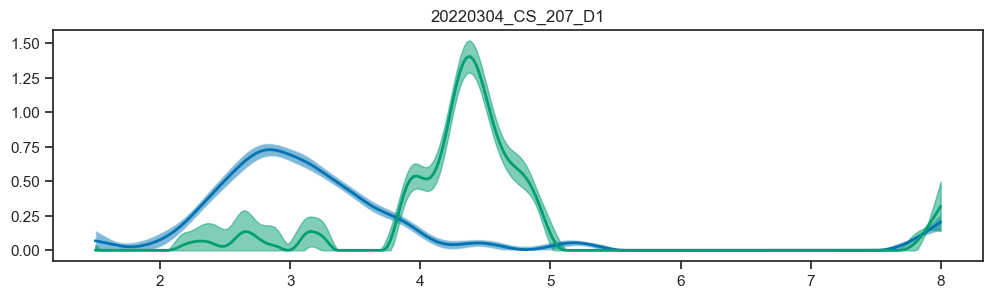

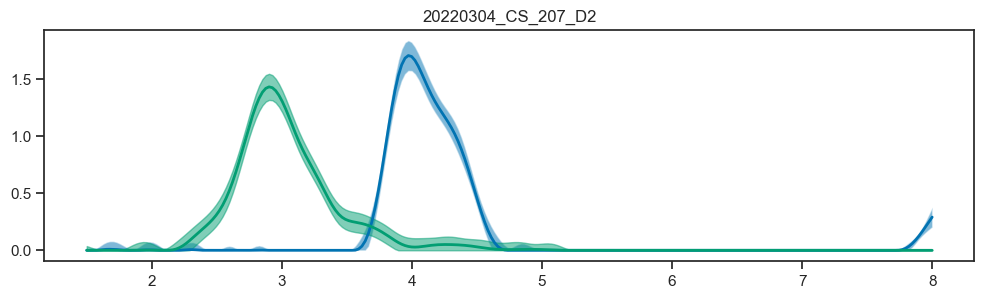

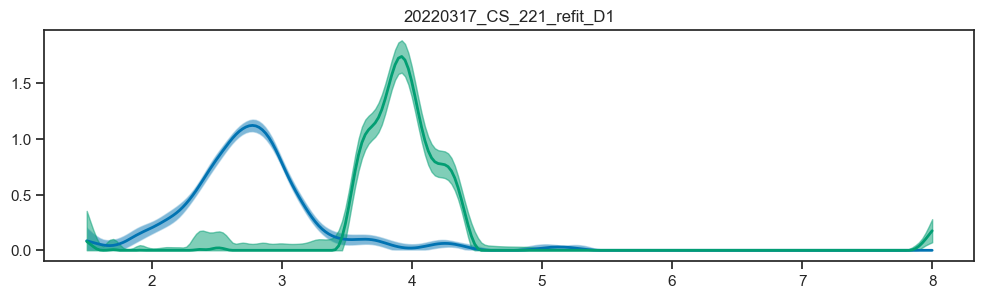

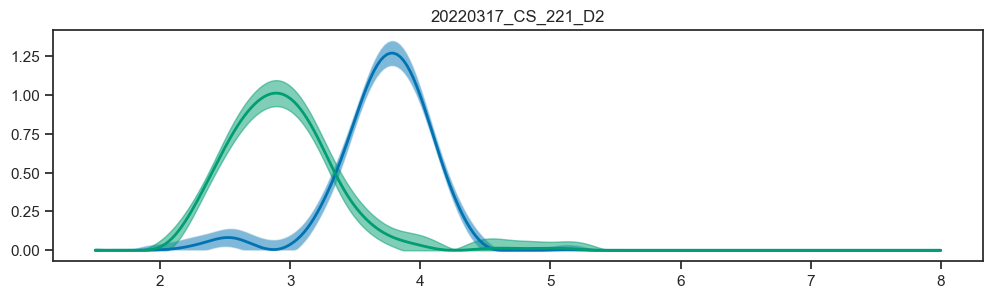

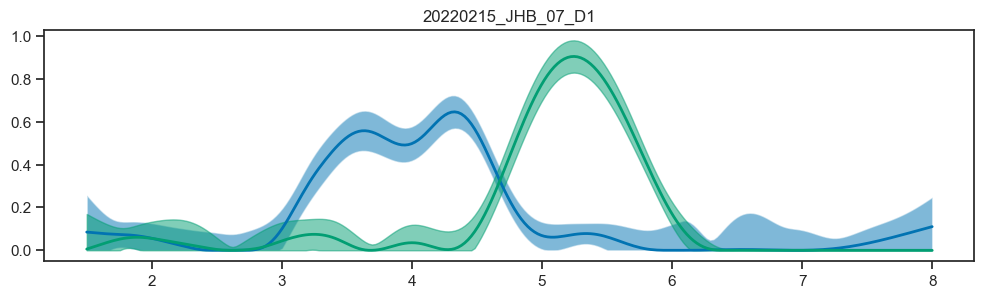

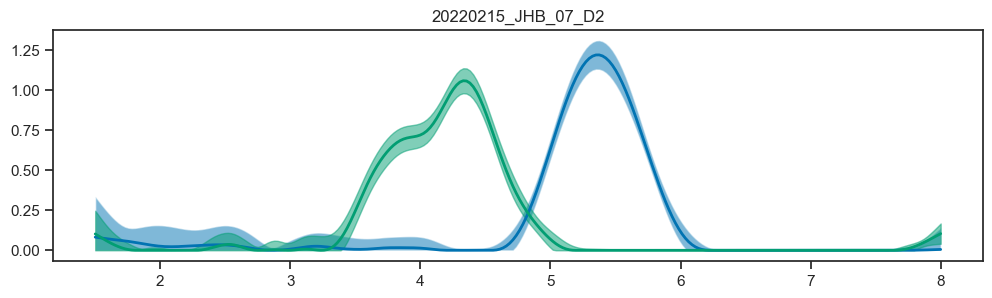

In [3]:
run_list = [
    "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D2_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D2_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D2_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D2_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221_refit/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D2_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D1_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D1_Holo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D2_Apo_DLFit.pkl",
    "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D2_Holo_DLFit.pkl",
]

runs = {
    "_".join(
        [
            run.split("/")[-2],
            run.split("/")[-1].split("_")[0],
            run.split("/")[-1].split("_")[1],
        ]
    ): run
    for run in run_list
}

r = np.linspace(1.5, 8, 256)  # nm


for key, file in runs.items():
    try:
        fit = load_pkl(file)
    except FileNotFoundError:
        raise

    if "Apo" in key:

        # Plot to make sure things worked
        fig, ax = plt.subplots(1, figsize=(12, 3))
        # ax[0].plot(fit.t, fit.Vexp)
        # ax[0].plot(fit.t, fit.model)
        # ax[0].plot(fit.t, fit.B)
        ax.plot(r, fit.P, linewidth=2)
        ax.set_title(key.replace("_Apo", ""))
        ax.fill_between(r, *fit.PUncert.ci(95).T, alpha=0.5)
        fit = load_pkl(file.replace("Apo", "Holo"))
        ax.plot(r, fit.P, color="#029e73", linewidth=2)
        ax.fill_between(r, *fit.PUncert.ci(95).T, color="#029e73", alpha=0.5)

# Plot DEER grid

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release 2022.45+release.20a5bfe160d0310bb7266ea8124fa2b8c5d99c1c 2022-11-07T08:55:01] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release r334 2022.45+release.20a5bfe 20a5bfe160d0310bb7266ea8124fa2b8c5d99c1c http://www.pyrosetta.org 2022-11-07T08:55:01
core.init: command: PyRosetta -ex1 -ex2aro -database /projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=404638338 seed_offset=0 real_seed=404638338 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=404638338 RG_type=mt19937
core.chemical.

  0%|          | 0/6 [00:00<?, ?it/s]

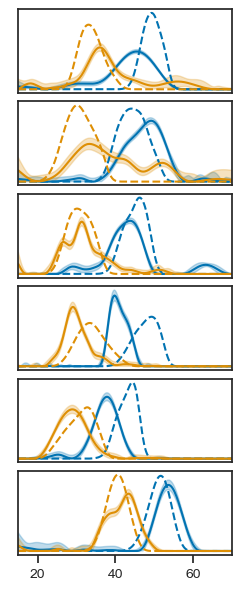

In [4]:
import matplotlib
from matplotlib import rc, font_manager

import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator

import pyrosetta

import MDAnalysis as mda
import chilife as xl

matplotlib.rc("font", family="sans-serif")
matplotlib.rc("font", serif="FreeSans")
matplotlib.rc("text", usetex="false")
matplotlib.rcParams.update({"font.size": 10})

props = {
    "family": "sans-serif",
    "sans-serif": ["FreeSans"],
    "weight": "normal",
    "size": 10,
}

r = np.linspace(1.5, 8, 256)  # nm

pyrosetta.init()

groups = {
    "cs_074": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (36, 211),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_Y.pdb"
        ),
    ),
    "cs_094": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (30, 206),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_Y.pdb"
        ),
    ),
    "cs_201": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (24, 180),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_Y.pdb"
        ),
    ),
    "cs_207": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (10, 150),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_Y.pdb"
        ),
    ),
    "cs_221": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (23, 150),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_Y.pdb"
        ),
    ),
    "js_007": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (60, 190),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_Y.pdb"
        ),
    ),
}

cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(
    nrows=len(groups),
    ncols=1,
    sharex=True,
    figsize=(7 * cm, len(groups) * 3 * cm),
    gridspec_kw={"hspace": 0.1},
)
for i, (
    hinge,
    (
        apo_fit,
        holo_fit,
        Pairs,
        Apo,
        Holo,
        apo_pose,
        holo_pose,
    ),
) in enumerate(tqdm(groups.items())):
    # Generate simulated fits from state X and Y pdbs
    site1, site2 = Pairs

    Apo1 = xl.SpinLabel("R1C", site1, Apo, chain="A", sample=5000)
    Holo1 = xl.SpinLabel("R1C", site1, Holo, chain="A", sample=5000)
    Apo2 = xl.SpinLabel("R1C", site2, Apo, sample=5000)
    Holo2 = xl.SpinLabel("R1C", site2, Holo, sample=5000)

    Apo1.name += "_Apo"
    Apo2.name += "_Apo"
    Holo1.name += "_Holo"
    Holo2.name += "_Holo"
    # get predicted distance distribution
    PApo = xl.distance_distribution(Apo1, Apo2, r=r * 10)
    PHolo = xl.distance_distribution(Holo1, Holo2, r=r * 10)

    # get predicted Cb distance
    dist_apo = np.linalg.norm(
        np.array(apo_pose.residue(site1).xyz("CB"))
        - np.array(apo_pose.residue(site2).xyz("CB"))
    )
    dist_holo = np.linalg.norm(
        np.array(holo_pose.residue(site1).xyz("CB"))
        - np.array(holo_pose.residue(site2).xyz("CB"))
    )

    preprocess(apo_fit)
    preprocess(holo_fit)

    # Plotting subroutine
    ax[i].plot(apo_fit.r, apo_fit.P, color="C0")
    ax[i].fill_between(apo_fit.r, *apo_fit.Pci95, color="C0", alpha=0.25)
    # simulated apo
    ax[i].plot(r * 10, PApo, linestyle="--", color="C0")
    # Cb apo
    # ax[i].axvline(dist_apo, linestyle="--", color="C0")
    # sim argmax
    # ax[i].axvline(np.array(r * 10)[np.argmax(PApo)], linestyle="--", color="C0")
    ax[i].plot(holo_fit.r, holo_fit.P, color="#de8f05")
    ax[i].fill_between(holo_fit.r, *holo_fit.Pci95, color="#de8f05", alpha=0.25)
    # simulated holo
    ax[i].plot(r * 10, PHolo, linestyle="--", color="#de8f05")
    # Cb holo
    # ax[i].axvline(dist_holo, linestyle="--", color="#de8f05")
    # sim argmax
    # ax[i].axvline(np.array(r * 10)[np.argmax(PHolo)], linestyle="--", color="#de8f05")
    ax[i].set_xlim(15, 70)
    ax[i].margins(x=0)
    ax[i].set_yticks([])
    ax[i].tick_params(labelsize=10, which="both")
    ax[i].tick_params(labelbottom=False, which="minor", width=1, length=3)

    if hinge != "js_007":
        ax[i].tick_params(axis="x", which="both", length=0)

plt.savefig(f"DEER_left.png", dpi=300, bbox_inches="tight", transparent=True)

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release 2022.45+release.20a5bfe160d0310bb7266ea8124fa2b8c5d99c1c 2022-11-07T08:55:01] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release r334 2022.45+release.20a5bfe 20a5bfe160d0310bb7266ea8124fa2b8c5d99c1c http://www.pyrosetta.org 2022-11-07T08:55:01
core.init: command: PyRosetta -ex1 -ex2aro -database /projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=561592977 seed_offset=0 real_seed=561592977 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=561592977 RG_type=mt19937
core.import_po

  0%|          | 0/6 [00:00<?, ?it/s]

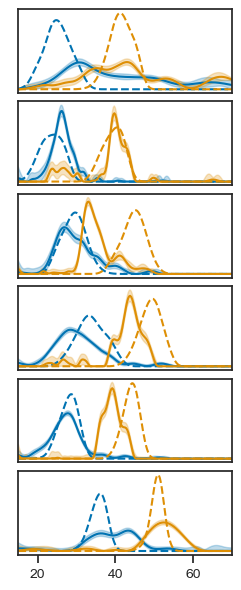

In [5]:
import matplotlib
from matplotlib import rc, font_manager

import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator

import pyrosetta

import MDAnalysis as mda
import chilife as xl

matplotlib.rc("font", family="sans-serif")
matplotlib.rc("font", serif="FreeSans")
matplotlib.rc("text", usetex="false")
matplotlib.rcParams.update({"font.size": 10})

props = {
    "family": "sans-serif",
    "sans-serif": ["FreeSans"],
    "weight": "normal",
    "size": 10,
}

r = np.linspace(1.5, 8, 256)  # nm

pyrosetta.init()

groups = {
    "cs_074": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (19, 179),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20210608_FF74/FF74_Y.pdb"
        ),
    ),
    "cs_094": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D2_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/D2_Holo_DLFit.pkl"
        ),
        # D2 pairs
        (12, 178),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_CS_094/CS_094_Y.pdb"
        ),
    ),
    "cs_201": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (35, 207),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220420_CS_201/CS_201_Y.pdb"
        ),
    ),
    "cs_207": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (25, 130),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220304_CS_207/CS_207_Y.pdb"
        ),
    ),
    "cs_221": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221_refit/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (43, 131),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220317_CS_221/CS_221_Y.pdb"
        ),
    ),
    "js_007": (
        # apo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D1_Apo_DLFit.pkl"
        ),
        # holo fit
        load_pkl(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/D1_Holo_DLFit.pkl"
        ),
        # D1 pairs
        (10, 219),
        # apo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_X.pdb"
        ),
        # holo
        mda.Universe(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_Y.pdb"
        ),
        # apo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_X.pdb"
        ),
        # holo pose
        pyrosetta.pose_from_file(
            "/projects/crispy_shifty/data/DEER/20220505/20220215_JHB_07/JHB_07_Y.pdb"
        ),
    ),
}

cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(
    nrows=len(groups),
    ncols=1,
    sharex=True,
    figsize=(7 * cm, len(groups) * 3 * cm),
    gridspec_kw={"hspace": 0.1},
)
for i, (
    hinge,
    (
        apo_fit,
        holo_fit,
        Pairs,
        Apo,
        Holo,
        apo_pose,
        holo_pose,
    ),
) in enumerate(tqdm(groups.items())):
    # Generate simulated fits from state X and Y pdbs
    site1, site2 = Pairs

    Apo1 = xl.SpinLabel("R1C", site1, Apo, chain="A", sample=5000)
    Holo1 = xl.SpinLabel("R1C", site1, Holo, chain="A", sample=5000)
    Apo2 = xl.SpinLabel("R1C", site2, Apo, sample=5000)
    Holo2 = xl.SpinLabel("R1C", site2, Holo, sample=5000)

    Apo1.name += "_Apo"
    Apo2.name += "_Apo"
    Holo1.name += "_Holo"
    Holo2.name += "_Holo"
    # get predicted distance distribution
    PApo = xl.distance_distribution(Apo1, Apo2, r=r * 10)
    PHolo = xl.distance_distribution(Holo1, Holo2, r=r * 10)

    # get predicted Cb distance
    dist_apo = np.linalg.norm(
        np.array(apo_pose.residue(site1).xyz("CB"))
        - np.array(apo_pose.residue(site2).xyz("CB"))
    )
    dist_holo = np.linalg.norm(
        np.array(holo_pose.residue(site1).xyz("CB"))
        - np.array(holo_pose.residue(site2).xyz("CB"))
    )

    preprocess(apo_fit)
    preprocess(holo_fit)

    # Plotting subroutine
    ax[i].plot(apo_fit.r, apo_fit.P, color="C0")
    ax[i].fill_between(apo_fit.r, *apo_fit.Pci95, color="C0", alpha=0.25)
    # simulated apo
    ax[i].plot(r * 10, PApo, linestyle="--", color="C0")
    # Cb apo
    # ax[i].axvline(dist_apo, linestyle="--", color="C0")
    # sim argmax
    # ax[i].axvline(np.array(r * 10)[np.argmax(PApo)], linestyle="--", color="C0")
    ax[i].plot(holo_fit.r, holo_fit.P, color="#de8f05")
    ax[i].fill_between(holo_fit.r, *holo_fit.Pci95, color="#de8f05", alpha=0.25)
    # simulated holo
    ax[i].plot(r * 10, PHolo, linestyle="--", color="#de8f05")
    # Cb holo
    # ax[i].axvline(dist_holo, linestyle="--", color="#de8f05")
    # sim argmax
    # ax[i].axvline(np.array(r * 10)[np.argmax(PHolo)], linestyle="--", color="#de8f05")
    ax[i].set_xlim(15, 70)
    ax[i].margins(x=0)
    ax[i].set_yticks([])
    ax[i].tick_params(labelsize=10, which="both")
    ax[i].tick_params(labelbottom=False, which="minor", width=1, length=3)

    if hinge != "js_007":
        ax[i].tick_params(axis="x", which="both", length=0)

plt.savefig(f"DEER_right.png", dpi=300, bbox_inches="tight", transparent=True)